In [110]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [23]:
BATCH_SIZE = 32
MAX_EPOCHS = 20

In [24]:
zip_path = tf.keras.utils.get_file(
 origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

In [25]:
df = pd.read_csv(csv_path)
df = df[5::6] # make hourly
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [27]:
wv = df['wv (m/s)']
wv_bad = wv == -9999.00
wv[wv_bad] = 0.0

max_wv = df['max. wv (m/s)']
max_wv_bad = max_wv == -9999.00
max_wv[max_wv_bad] = 0.0

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


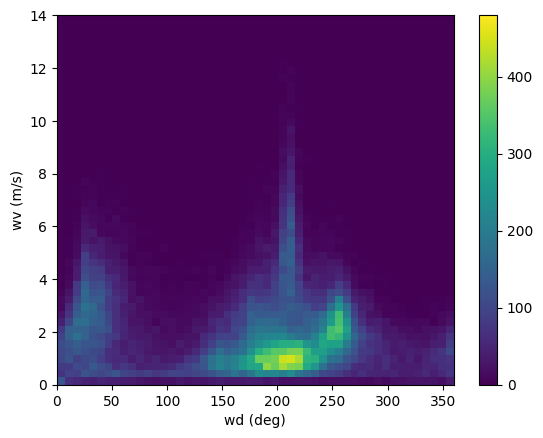

In [28]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('wd (deg)')
plt.ylabel('wv (m/s)')
plt.show()

In [29]:
wv = df.pop('wv (m/s)')
wv_max = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)')*np.pi/180.0

df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = wv*np.cos(wd_rad)
df['max Wy'] = wv*np.sin(wd_rad)

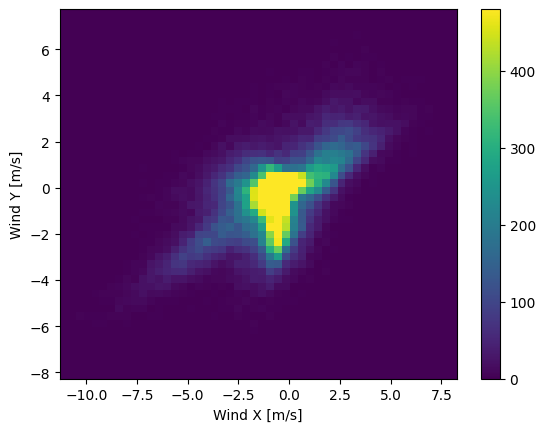

In [30]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

In [31]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [32]:
column_indices = {colname:i for i, colname in enumerate(df.columns)}

n = len(df)
train_df_original = df[:int(n*0.7)] # 70% train
val_df_original = df[int(n*0.7):int(n*0.9)] # 20% val
test_df_original = df[int(n*0.9):] # 10% test

num_features = df.shape[1]

print(f'train: {train_df_original.shape}\tval: {val_df_original.shape}\ttest: {test_df_original.shape}')

train: (49063, 19)	val: (14018, 19)	test: (7010, 19)


In [33]:
# normalizing with training set mean and standard deviation. !! this is not 100% clean -> since it's a time series, taking the mean over 
# the entire training dataset brings information from the future (end of the time series) into the past (start of the time series). however,
# because we've already taken away val and test datasets, this is not 'entirely dishonest' ;) 
train_mean = train_df_original.mean(axis=0)
train_sd = train_df_original.std(axis=0)

train_df = (train_df_original - train_mean) / train_sd
val_df = (val_df_original - train_mean) / train_sd
test_df = (test_df_original - train_mean) / train_sd

C:\Users\robet\AppData\Local\Temp\ipykernel_27040\2188831089.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


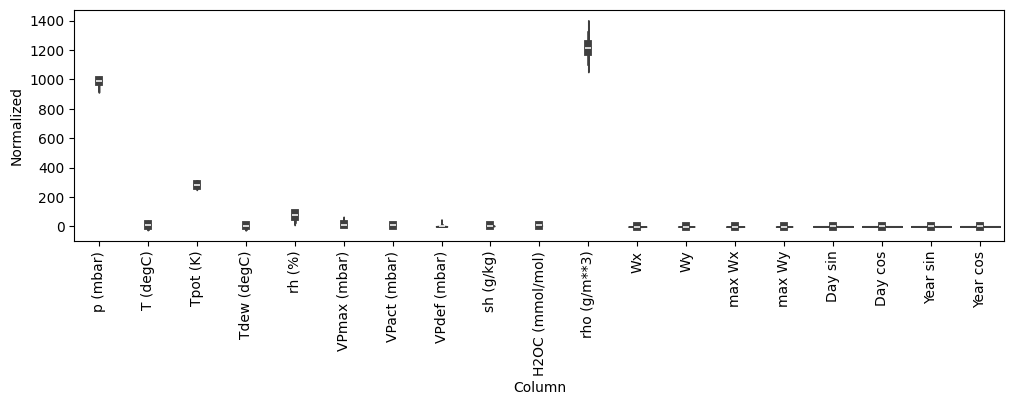

In [34]:
df_melted = df.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 3))
ax = sns.violinplot(x='Column', y='Normalized', data=df_melted)
_ = ax.set_xticklabels(df.keys(), rotation=90)

C:\Users\robet\AppData\Local\Temp\ipykernel_27040\2790111085.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


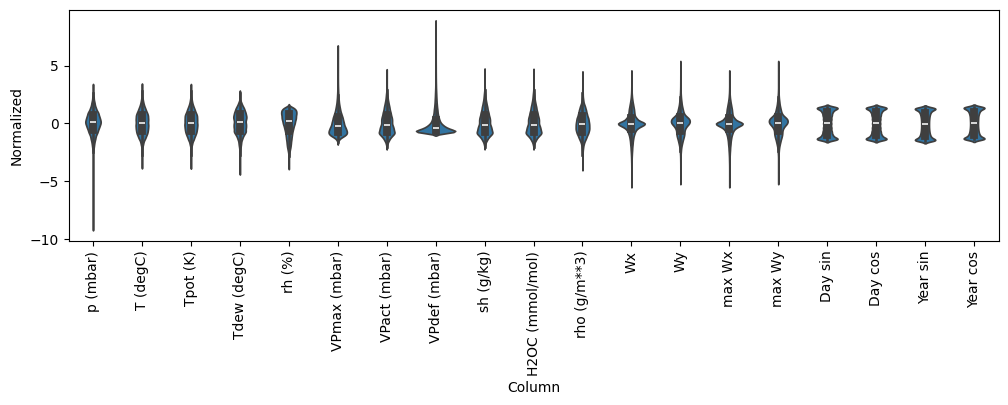

In [35]:
df_normalized = (df - train_mean) / train_sd
df_normalized = df_normalized.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 3))
ax = sns.violinplot(x='Column', y='Normalized', data=df_normalized)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [66]:
class WindowGenerator:


    def __init__(self, input_width, label_width, offset, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.offset = offset

        self.total_window_size = input_width + offset

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None) # None -> slice goes until end of iterable on which it's used
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]


    def __repr__(self):
        return '\n'.join([
            f'Total window size = {self.total_window_size}',
            f'Input indices = {self.input_indices}',
            f'Label indices = {self.label_indices}',
            f'Label columns = {self.label_columns}'
        ])


    def split_window(self, features):
        
        # (1st dimension is batch, 2nd is timestep, 3rd is variable)
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.label_slice, :]
        
        # keep only desired output columns
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels


    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        
        inputs, labels = self.example
        
        plt.figure(figsize=(12, 5))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(
                self.input_indices, 
                inputs[n, :, plot_col_index],
                label='Inputs', 
                marker='.', 
                zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(
                self.label_indices, 
                labels[n, :, label_col_index],
                edgecolors='k', 
                label='Labels', 
                c='#2ca02c', 
                s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices, 
                    predictions[n, :, label_col_index],
                    marker='X', 
                    edgecolors='k', 
                    label='Predictions',
                    c='#ff7f0e', 
                    s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        plt.tight_layout()


    def make_dataset(self, data):
        data = np.array(data, dtype=float)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=BATCH_SIZE
        )
        ds = ds.map(self.split_window)
        return ds
    

    def make_dataset_no_shuffle(self, data):
        data = np.array(data, dtype=float)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=BATCH_SIZE
        )
        ds = ds.map(self.split_window)
        return ds


    @property
    def train_ds(self):
        return self.make_dataset(self.train_df)
    

    @property
    def val_ds(self):
        return self.make_dataset(self.val_df)
    

    @property
    def test_ds(self):
        return self.make_dataset(self.test_df)
    

    @property
    def test_ds_no_shuffle(self):
        return self.make_dataset_no_shuffle(self.test_df)


    @property
    def example(self):
        return next(iter(self.test_ds))

In [67]:
w = WindowGenerator(input_width=24*10, label_width=24, offset=24, label_columns=['T (degC)'])

example_window = tf.stack(
    [np.array(train_df[:w.total_window_size]),
    np.array(train_df[10:10 + w.total_window_size]),
    np.array(train_df[20:20 + w.total_window_size])
])

example_inputs, example_labels = w.split_window(example_window)

print(example_inputs.shape)
print(example_labels.shape)

(3, 240, 19)
(3, 24, 1)


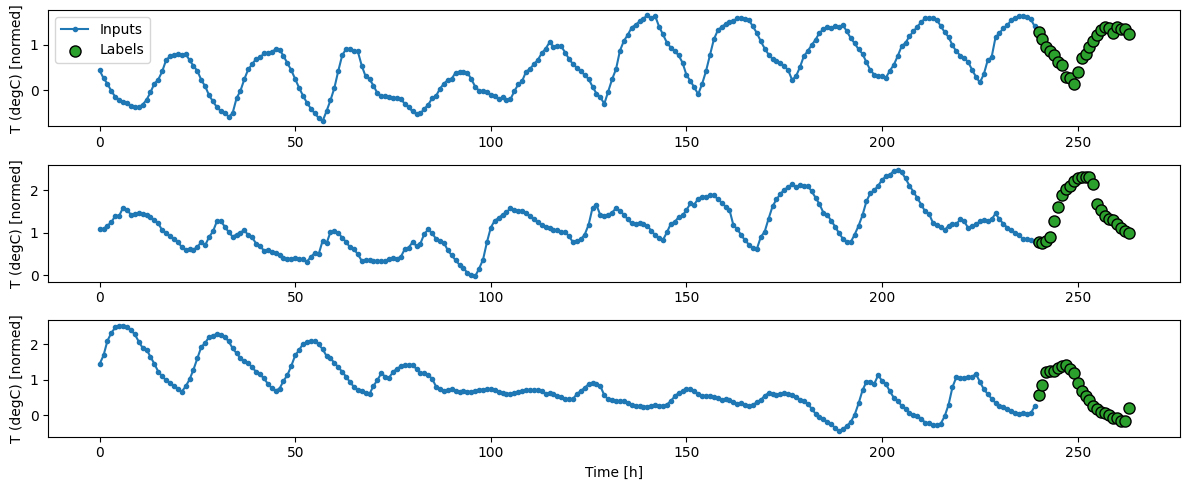

In [68]:
w.plot()

In [40]:
for inputs, labels in w.train_ds.take(1):
    print(inputs.shape, labels.shape)

(32, 240, 19) (32, 24, 1)


In [41]:
inputs, targets = next(iter(w.train_ds.take(1)))
print(f'input shape = {inputs.shape}')
print(f'target shape = {targets.shape}')

input shape = (32, 240, 19)
target shape = (32, 24, 1)


### **Compare multiple models**

In [42]:
def compile_and_fit(model, window, patience=2):
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min'
    )

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )

    history = model.fit(
        window.train_ds,
        validation_data=window.val_ds,
        epochs=MAX_EPOCHS,
        callbacks=[early_stopping]
    )

    print(f'\n *** Trained {model.count_params():,} parameters on {window.train_df.shape[0]:,} datapoints *** \n')

    return history

In [43]:
val_performance = {}
performance = {}

##### **Single-output-step- single-output feature model - naïve baseline model $x(t) = x(t-1)$**

(32, 24, 19)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0143 - mean_absolute_error: 0.0852
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130 - mean_absolute_error: 0.0788


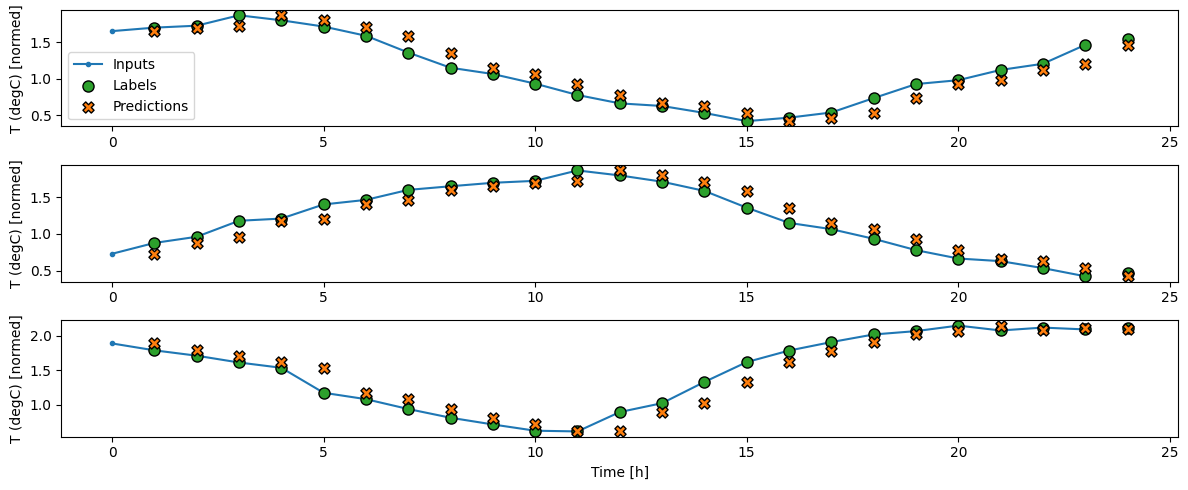

In [360]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index] # this returns a 2d tensor because we're selecting all batches and timesteps of one feature
        return result[:, :, tf.newaxis] # this restores the 3d shape by adding a singleton dimension as the last axis


baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(w_wide.example[0].shape)

performance['Baseline'] = baseline.evaluate(w_wide.test_ds, return_dict=True)
val_performance['Baseline'] = baseline.evaluate(w_wide.val_ds, return_dict=True)

w_wide.plot(baseline)

##### **Single-output-step- single-output feature model - linear model, single-lag $x(t) = f(x(t-1))$**

In [72]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_wide.example[0].shape}')
print(f'output shape = {linear(w_wide.example[0]).shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)


In [73]:
history = compile_and_fit(linear, w_wide)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3445 - mean_absolute_error: 0.3920 - val_loss: 0.0095 - val_mean_absolute_error: 0.0726
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0729 - val_loss: 0.0094 - val_mean_absolute_error: 0.0722
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0097 - mean_absolute_error: 0.0722 - val_loss: 0.0092 - val_mean_absolute_error: 0.0713
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0095 - mean_absolute_error: 0.0714 - val_loss: 0.0090 - val_mean_absolute_error: 0.0699
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0092 - mean_absolute_error: 0.0704 - val_loss: 0.0088 - val_mean_absolute_error: 0.0692
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0091 - mean_absolute_error: 0.0696 - val_loss: 0.0087 - val_mean_absolute_error: 0.0689
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0090 - mean_absolute_err

In [74]:
val_performance['Linear'] = linear.evaluate(w_wide.val_ds, return_dict=True)
performance['Linear'] = linear.evaluate(w_wide.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0682
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0084 - mean_absolute_error: 0.0667


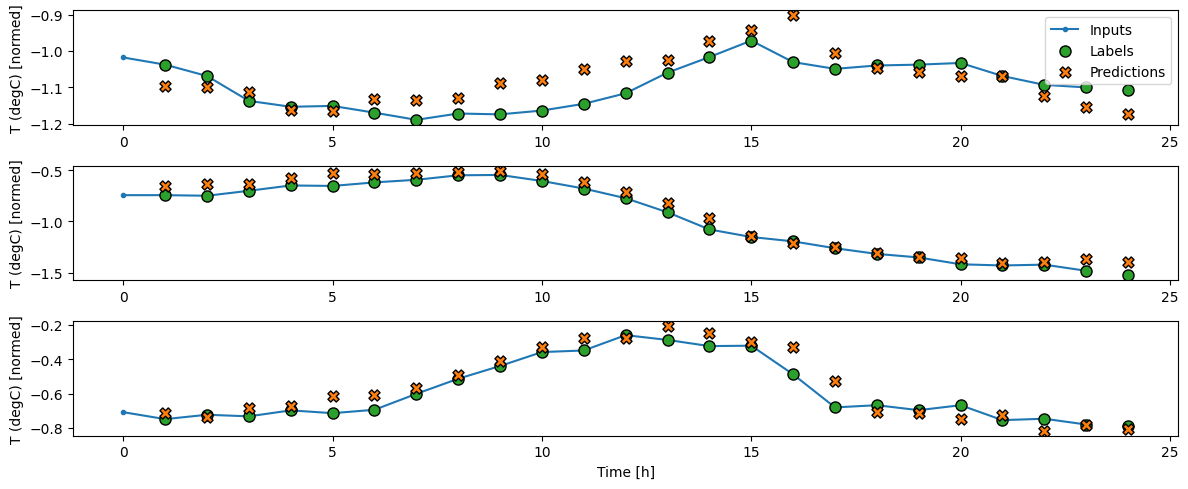

In [75]:
w_wide.plot(linear)

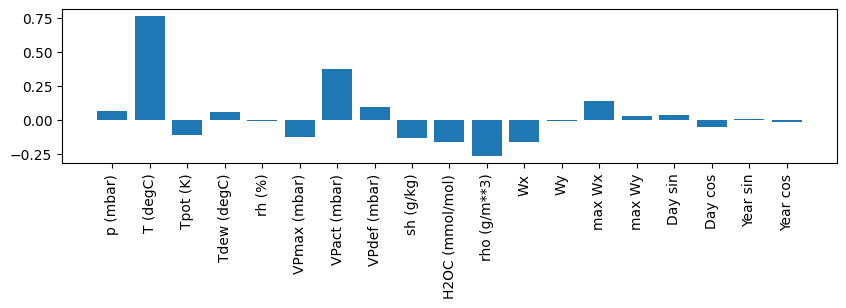

In [76]:
weights = linear.layers[0].kernel[:, 0].numpy()
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(x=range(len(train_df.columns)), height= weights)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels(train_df.columns, rotation=90)
plt.show()

##### **Single-output-step- single-output feature model - dense model, single-lag $x(t) = f(x(t-1))$**

In [326]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_wide.example[0].shape}')
print(f'output shape = {dense(w_wide.example[0]).shape}')
print(f'output data shape = {w_wide.example[1].shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)
output data shape = (32, 24, 1)


In [251]:
history = compile_and_fit(dense, w_wide)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.1117 - val_loss: 0.0070 - val_mean_absolute_error: 0.0598
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0583 - val_loss: 0.0067 - val_mean_absolute_error: 0.0582
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0566 - val_loss: 0.0064 - val_mean_absolute_error: 0.0560
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0554 - val_loss: 0.0064 - val_mean_absolute_error: 0.0570
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0548 - val_loss: 0.0063 - val_mean_absolute_error: 0.0553
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0544 - val_loss: 0.0064 - val_mean_absolute_error: 0.0559
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0059 - mean_absolute_e

In [252]:
val_performance['Dense'] = dense.evaluate(w_wide.val_ds, return_dict=True)
performance['Dense'] = dense.evaluate(w_wide.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0065 - mean_absolute_error: 0.0560
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0560


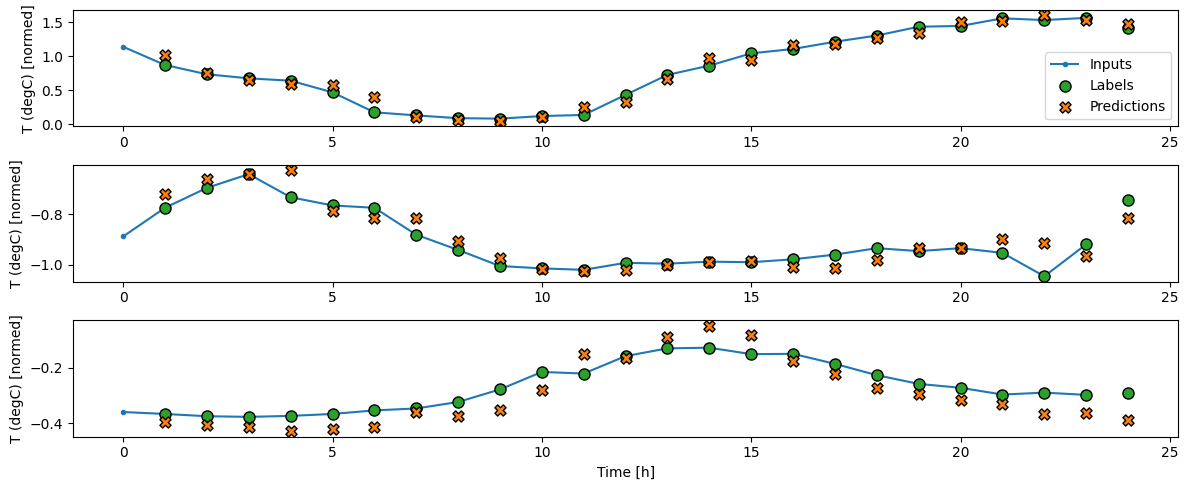

In [253]:
w_wide.plot(dense)

##### **Single-output-step- single-output feature model - dense model, multi-lag $x(t) = f(x(t-1), x(t-2), ... x(t-h))$**

One approach to provide a multi-lag input to a dense model is to flatten the inputs, which makes $x(t)$ a function of the lagged values of all features. The problem with this is that the model can only be called on windows of the exact same shape it was created with:

In [328]:
dense_multistep = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1])
])

w_sequence = WindowGenerator(input_width=12, label_width=1, offset=1, label_columns=['T (degC)'])


print(f'input shape = {w_sequence.example[0].shape}')
print(f'output shape = {dense_multistep(w_sequence.example[0]).shape}')
print(f'output data shape = {w_sequence.example[1].shape}')
try:
    print(f'output shape, different input = {dense_multistep(w_wide.example[0]).shape}')
except Exception as e:
    print(f'\n{type(e).__name__}: {e}')

input shape = (32, 12, 19)
output shape = (32, 1, 1)
output data shape = (32, 1, 1)

ValueError: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_84" is incompatible with the layer: expected axis -1 of input shape to have value 228, but received input with shape (32, 456)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 24, 19), dtype=float32)
  • training=None
  • mask=None


In [329]:
history = compile_and_fit(dense_multistep, w_sequence)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1103 - mean_absolute_error: 0.1852 - val_loss: 0.0110 - val_mean_absolute_error: 0.0785
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0107 - mean_absolute_error: 0.0777 - val_loss: 0.0100 - val_mean_absolute_error: 0.0750
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0088 - mean_absolute_error: 0.0692 - val_loss: 0.0073 - val_mean_absolute_error: 0.0620
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0085 - mean_absolute_error: 0.0674 - val_loss: 0.0084 - val_mean_absolute_error: 0.0664
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0655 - val_loss: 0.0089 - val_mean_absolute_error: 0.0684

 *** Trained 8,417 parameters on 49,063 datapoints *** 



In [330]:
val_performance['Dense multi-step'] = dense_multistep.evaluate(w_sequence.val_ds, return_dict=True)
performance['Dense multi-step'] = dense_multistep.evaluate(w_sequence.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0090 - mean_absolute_error: 0.0691
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - mean_absolute_error: 0.0739 


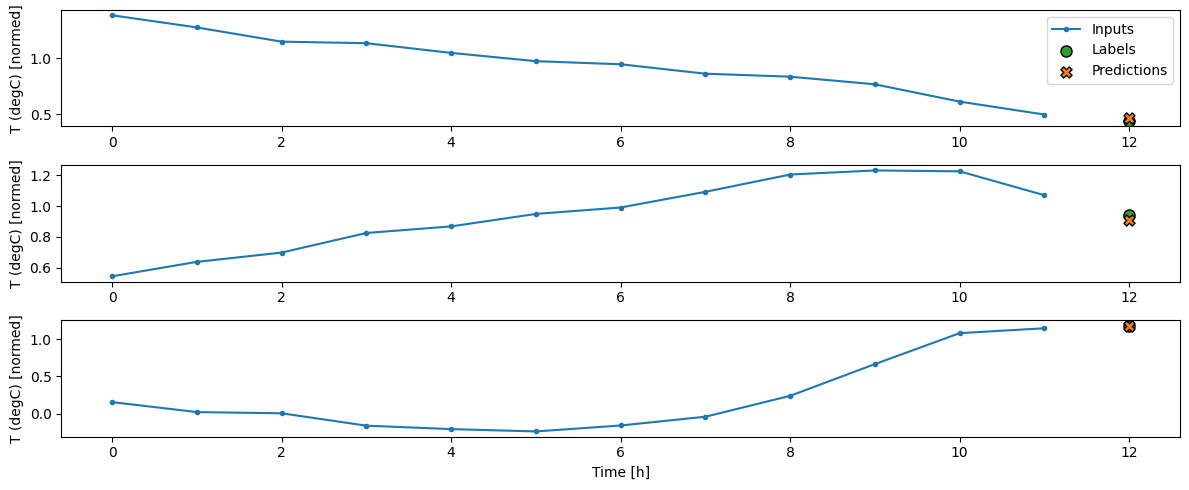

In [331]:
w_sequence.plot(dense_multistep)

Convolutional networks don't have the above problem regarding their input shape

##### **Single-output-step- single-output feature model - convolutional model, multi-lag $x(t) = f(x(t-1), x(t-2), ... x(t-h))$**

In [ ]:
CONV_WIDTH = 12
LABEL_WIDTH = 1
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1) # because the conv. kernel leads to shorter output (exactly how much shorter depends on padding type)

conv = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=5, kernel_size=(CONV_WIDTH,), activation='relu'),
    tf.keras.layers.Dense(units=1),
])

w_conv = WindowGenerator(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_conv.example[0].shape}')
print(f'output shape = {conv(w_conv.example[0]).shape}')
print(f'output data shape = {w_conv.example[1].shape}')
try:
    print(f'output shape, different input = {conv(w_wide.example[0]).shape}')
except Exception as e:
    print(f'\n{type(e).__name__}: {e}')


input shape = (32, 12, 19)
output shape = (32, 1, 1)
output data shape = (32, 1, 1)
output shape, different input = (32, 13, 1)


In [274]:
history = compile_and_fit(conv, w_conv)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1649 - mean_absolute_error: 0.2421 - val_loss: 0.0120 - val_mean_absolute_error: 0.0826
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0120 - mean_absolute_error: 0.0818 - val_loss: 0.0111 - val_mean_absolute_error: 0.0790
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0096 - mean_absolute_error: 0.0721 - val_loss: 0.0081 - val_mean_absolute_error: 0.0661
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.0683 - val_loss: 0.0083 - val_mean_absolute_error: 0.0654
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.0679 - val_loss: 0.0075 - val_mean_absolute_error: 0.0621
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0083 - mean_absolute_error: 0.0657 - val_loss: 0.0078 - val_mean_absolute_error: 0.0622
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0081 - mean_absolute_err

In [300]:
val_performance['Conv1D multi-step'] = conv.evaluate(w_conv.val_ds, return_dict=True)
performance['Conv1D multi-step'] = conv.evaluate(w_conv.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0072 - mean_absolute_error: 0.0619
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - mean_absolute_error: 0.0636


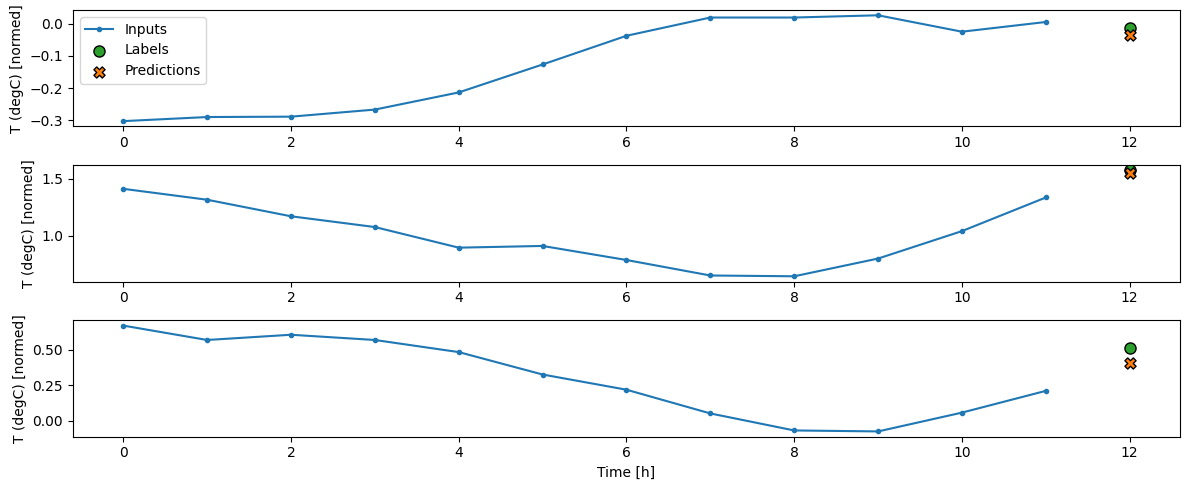

In [276]:
w_conv.plot(conv, plot_col='T (degC)')

##### **Single-output-step- single-output feature model - RNN** -> $h_t = \sigma(W_{hh}h_{t-1} + W_{xh}x_t)$, $y_t = W_{hy}h_t$

In [343]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

w_lstm = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_lstm.example[0].shape}')
print(f'output shape = {lstm(w_lstm.example[0]).shape}')
print(f'output data shape = {w_lstm.example[1].shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)
output data shape = (32, 24, 1)


In [344]:
history = compile_and_fit(lstm, w_lstm)

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.1089 - val_loss: 0.0062 - val_mean_absolute_error: 0.0552
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0556 - val_loss: 0.0059 - val_mean_absolute_error: 0.0538
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - loss: 0.0060 - mean_absolute_error: 0.0537 - val_loss: 0.0057 - val_mean_absolute_error: 0.0521
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - loss: 0.0058 - mean_absolute_error: 0.0526 - val_loss: 0.0056 - val_mean_absolute_error: 0.0516
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.0057 - mean_absolute_error: 0.0519 - val_loss: 0.0056 - val_mean_absolute_error: 0.0513
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - loss: 0.0056 - mean_absolute_error: 0.0515 - val_loss: 0.0056 - val_mean_absolute_error: 0.0515
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 0.0055 - mea

In [347]:
val_performance['LSTM multi-step'] = lstm.evaluate(w_lstm.val_ds, return_dict=True)
performance['LSTM multi-step'] = lstm.evaluate(w_lstm.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0509
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0516


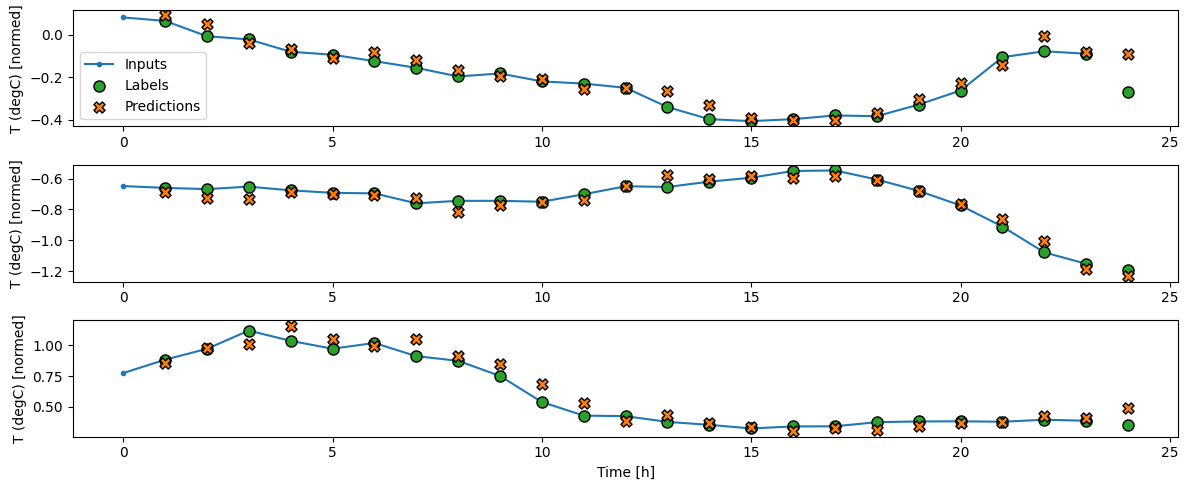

In [348]:
w_lstm.plot(lstm, plot_col='T (degC)')

In [361]:
def make_ypred(model, w, train_mean, train_sd):
    ypred_scaled = model.predict(w.test_ds_no_shuffle)
    ypred = ypred_scaled*train_sd + train_mean
    ypred = tf.squeeze(ypred, axis=-1).numpy()
    reconstructed = np.full((len(w.test_df),), np.nan)
    start_index = w.input_width
    for i, prediction in enumerate(ypred):
        reconstructed[start_index + i] = prediction[0]

    return reconstructed


ypred_baseline = make_ypred(baseline, w_wide, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_linear = make_ypred(linear, w_wide, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_dense = make_ypred(dense, w_wide, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_dense_multistep = make_ypred(dense_multistep, w_sequence, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_conv = make_ypred(conv, w_conv, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_lstm = make_ypred(lstm, w_lstm, train_mean['T (degC)'], train_sd['T (degC)'])

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


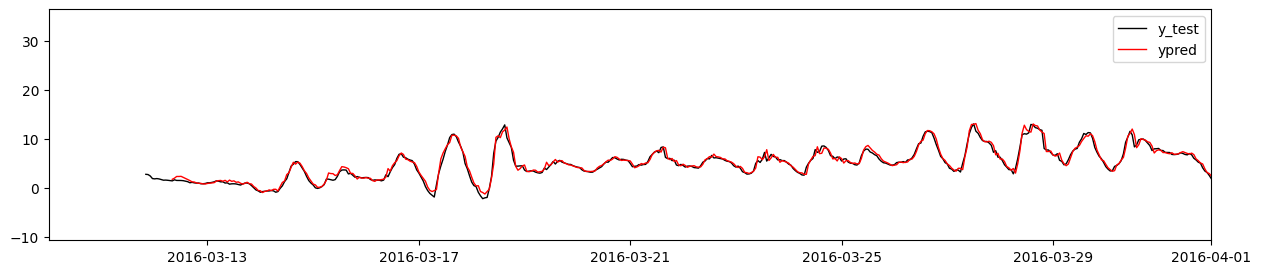

In [366]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_time[int(n*0.9):], test_df_original['T (degC)'], linewidth=1, color='black', label='y_test')
ax.plot(date_time[int(n*0.9):], ypred_conv, linewidth=1, color='red', label='ypred')
#ax.plot(date_time[-len(ypred_baseline):], ypred_baseline, color='gray', label='baseline')
ax.set_xlim(datetime(year=2016, month=3, day=10), datetime(year=2016, month=4, day=1))
ax.legend()
plt.show()